In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import make_classification

In [2]:
n_samples = 4
n_features = 2
n_informative = 2
n_redundant = 0
n_clusters_per_class = 1
class_sep = 2
random_state = randint(0, 10000)

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_clusters_per_class=n_clusters_per_class,
    class_sep=class_sep,
    random_state=random_state
)

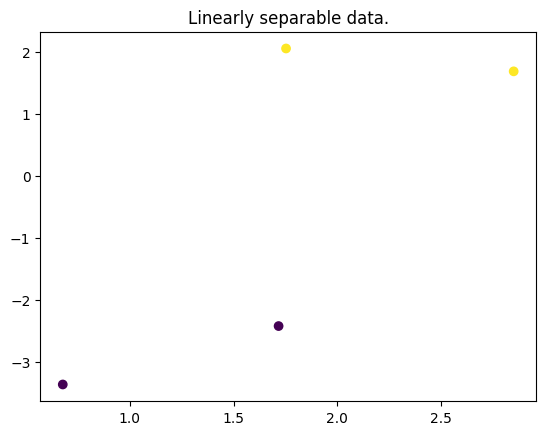

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Linearly separable data.')
plt.show()

In [4]:
weights = np.ones((X.shape[1] + 1, 1))

In [5]:
weights

array([[1.],
       [1.],
       [1.]])

In [6]:
x_bias = np.hstack((np.ones((X.shape[0], 1)), X))

In [7]:
weights

array([[1.],
       [1.],
       [1.]])

In [8]:
x_bias

array([[ 1.        ,  0.67650255, -3.36765675],
       [ 1.        ,  2.85038897,  1.68590408],
       [ 1.        ,  1.75294606,  2.0549034 ],
       [ 1.        ,  1.71701681, -2.4248064 ]])

In [9]:
x_bias[y.T==0] = -x_bias[y.T==0]

In [10]:
x_bias

array([[-1.        , -0.67650255,  3.36765675],
       [ 1.        ,  2.85038897,  1.68590408],
       [ 1.        ,  1.75294606,  2.0549034 ],
       [-1.        , -1.71701681,  2.4248064 ]])

In [11]:
learning_rate = .02
duration = 100

In [12]:
weights

array([[1.],
       [1.],
       [1.]])

In [13]:
np.where(x_bias@weights>0, 1, -1)

array([[ 1],
       [ 1],
       [ 1],
       [-1]])

In [14]:
# vectorized mapping for checking if classification was ok

class_validity_map_template = {
    1: 0,
    -1: 1
}
vectorized_map = np.vectorize(class_validity_map_template.get)

In [15]:
y.size

4

In [16]:
# find elements that are not correctly classified
_wrong_classification = (vectorized_map(np.where(x_bias@weights>0, 1, -1)) != y.reshape(y.size, 1))

# to pass this index correctly use:
x_bias[_wrong_classification[:, 0]]

array([[ 1.        ,  2.85038897,  1.68590408],
       [ 1.        ,  1.75294606,  2.0549034 ],
       [-1.        , -1.71701681,  2.4248064 ]])

In [17]:
x_bias[_wrong_classification[:, 0]]

array([[ 1.        ,  2.85038897,  1.68590408],
       [ 1.        ,  1.75294606,  2.0549034 ],
       [-1.        , -1.71701681,  2.4248064 ]])

In [18]:
learning_term = learning_rate/2
for _ in range(duration):
    hard_limiter = np.where(x_bias@weights>0, 1, -1)

    mapped_hard_limiter =  vectorized_map(hard_limiter)
    wrongly_assigned_points = mapped_hard_limiter != y.reshape(y.size, 1)
    
    # weights_to_update = weights[wrongly_assigned_points[:, 0]]
    hard_limiter_for_update = hard_limiter[wrongly_assigned_points[:, 0]]
    x_bias_for_update = x_bias[wrongly_assigned_points[:, 0]]

    weights = weights + x_bias_for_update.T@(learning_term * (1 - hard_limiter_for_update))

In [14]:
weights

array([[ 0.98      ],
       [-2.93637346],
       [-2.99726434]])

# plot

In [15]:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]

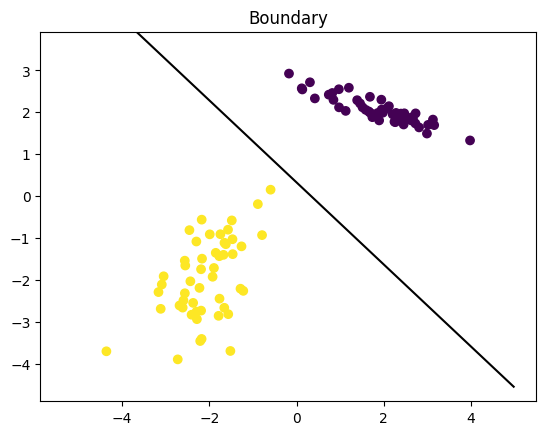

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1_vals, x2_vals, 'k-')
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.title('Boundary')
plt.show()

In [27]:
weights

array([[ 0.6       ],
       [-1.20618019],
       [-0.13683823]])